# Comparison of classic and modern LeNet5 architecture

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Loading and visualizing data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

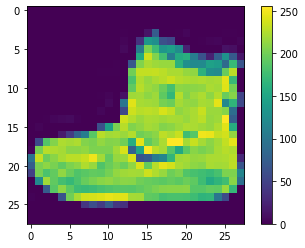

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

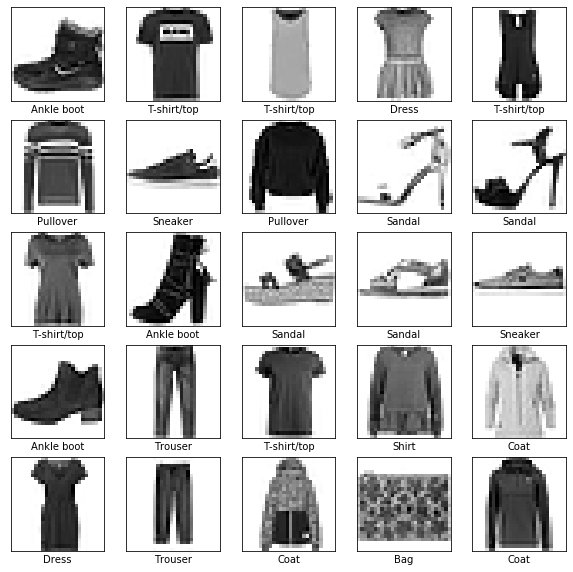

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

## Train classic LeNet5 Model

In [8]:
n_epochs = 100

In [9]:
model = keras.Sequential([
    keras.layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation = 'tanh'),
    keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(16, (5,5), activation = 'tanh'),
    keras.layers.AveragePooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='tanh'),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
%%time
history_old = model.fit(train_images, train_labels, epochs=n_epochs, batch_size = 100, 
                    validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 113us/sample - loss: 0.6315 - accuracy: 0.7664 - val_loss: 0.5165 - val_accuracy: 0.8139
Epoch 2/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4377 - accuracy: 0.8418 - val_loss: 0.4366 - val_accuracy: 0.8432
Epoch 3/100
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3872 - accuracy: 0.8583 - val_loss: 0.4000 - val_accuracy: 0.8542
Epoch 4/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3559 - accuracy: 0.8689 - val_loss: 0.3692 - val_accuracy: 0.8655
Epoch 5/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3317 - accuracy: 0.8775 - val_loss: 0.3558 - val_accuracy: 0.8664
Epoch 6/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.3156 - accuracy: 0.8836 - val_loss: 0.3656 - val_accuracy: 0.8671
Epoch 7/100
60000/60000 [========================

Epoch 55/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0509 - accuracy: 0.9834 - val_loss: 0.4961 - val_accuracy: 0.8865
Epoch 56/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0506 - accuracy: 0.9830 - val_loss: 0.5058 - val_accuracy: 0.8835
Epoch 57/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0486 - accuracy: 0.9839 - val_loss: 0.5076 - val_accuracy: 0.8856
Epoch 58/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0442 - accuracy: 0.9859 - val_loss: 0.5223 - val_accuracy: 0.8887
Epoch 59/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0426 - accuracy: 0.9859 - val_loss: 0.5135 - val_accuracy: 0.8831
Epoch 60/100
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0425 - accuracy: 0.9864 - val_loss: 0.5266 - val_accuracy: 0.8856
Epoch 61/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0387 - ac

## Train modern LeNet5 model

In [19]:
model = keras.Sequential([
    keras.layers.Conv2D(6, (5,5), input_shape=(28,28,1), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Conv2D(16, (5,5), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
%%time
history_new = model.fit(train_images, train_labels, epochs=n_epochs, batch_size = 100, 
                    validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 81us/sample - loss: 0.8841 - accuracy: 0.6692 - val_loss: 0.5587 - val_accuracy: 0.7900
Epoch 2/100
60000/60000 [==============================] - 4s 72us/sample - loss: 0.6142 - accuracy: 0.7731 - val_loss: 0.4863 - val_accuracy: 0.8212
Epoch 3/100
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5534 - accuracy: 0.7927 - val_loss: 0.4509 - val_accuracy: 0.8273
Epoch 4/100
60000/60000 [==============================] - 4s 71us/sample - loss: 0.5198 - accuracy: 0.8072 - val_loss: 0.4265 - val_accuracy: 0.8339
Epoch 5/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4940 - accuracy: 0.8189 - val_loss: 0.4044 - val_accuracy: 0.8482
Epoch 6/100
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4724 - accuracy: 0.8240 - val_loss: 0.3893 - val_accuracy: 0.8518
Epoch 7/100
60000/60000 [=========================

Epoch 55/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3383 - accuracy: 0.8739 - val_loss: 0.2866 - val_accuracy: 0.8906
Epoch 56/100
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3378 - accuracy: 0.8736 - val_loss: 0.2867 - val_accuracy: 0.8943
Epoch 57/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3372 - accuracy: 0.8745 - val_loss: 0.2837 - val_accuracy: 0.8973
Epoch 58/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3340 - accuracy: 0.8755 - val_loss: 0.2862 - val_accuracy: 0.8935
Epoch 59/100
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3397 - accuracy: 0.8738 - val_loss: 0.2971 - val_accuracy: 0.8945
Epoch 60/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3353 - accuracy: 0.8746 - val_loss: 0.2842 - val_accuracy: 0.8963
Epoch 61/100
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3334 - ac

## Visualize Results

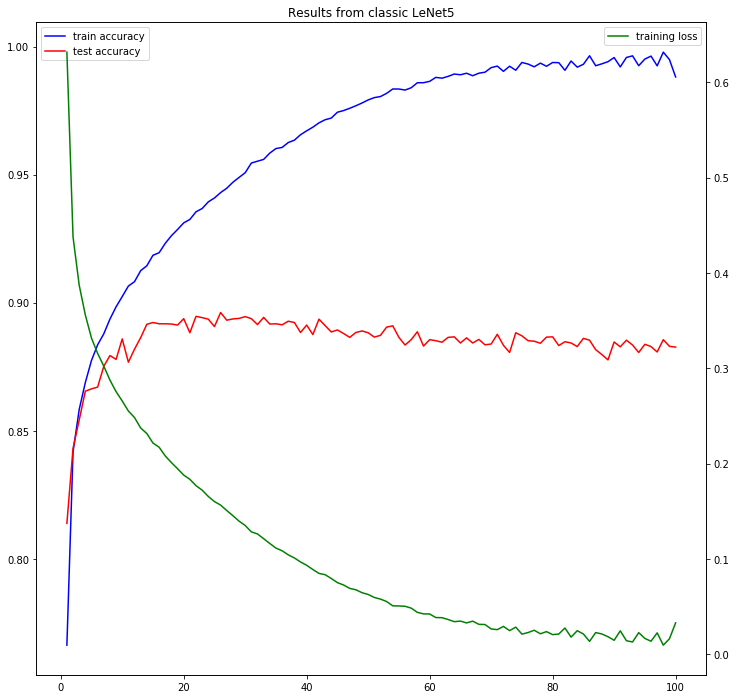

In [22]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax1.plot(range(1,n_epochs+1), history_old.history['accuracy'], color='b')
ax1.plot(range(1,n_epochs+1), history_old.history['val_accuracy'], color='r')
ax1.legend(['train accuracy', 'test accuracy'])
ax2 = ax1.twinx()
ax2.plot(range(1,n_epochs+1), history_old.history['loss'], color = 'g')
ax2.legend(['training loss'])
plt.title('Results from classic LeNet5')
plt.show()

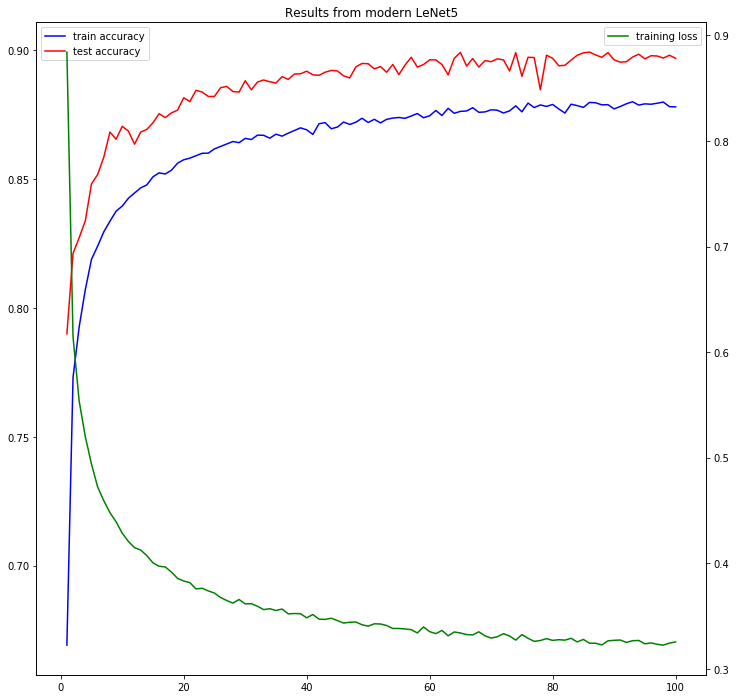

In [23]:
fig, ax1 = plt.subplots(figsize=(12,12))
ax1.plot(range(1,n_epochs+1), history_new.history['accuracy'], color='b')
ax1.plot(range(1,n_epochs+1), history_new.history['val_accuracy'], color='r')
ax1.legend(['train accuracy', 'test accuracy'])
ax2 = ax1.twinx()
ax2.plot(range(1,n_epochs+1), history_new.history['loss'], color = 'g')
ax2.legend(['training loss'])
plt.title('Results from modern LeNet5')
plt.show()